# 🧠 Loan Prediction Project
A machine learning project using Logistic Regression, KNN, and Random Forest to predict loan approval based on customer features.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('loan_train')

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace =  True)
df['Married'].fillna(df['Married'].mode()[0], inplace =  True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace =  True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace =  True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace =  True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace =  True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace =  True)


/tmp/ipython-input-8-3746743710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace =  True)
/tmp/ipython-input-8-3746743710.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

# 🌤 LabelEncoding and One-Hot Encoding

Encoding data so that the model can read it.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)
df['Education'] = le.fit_transform(df['Education'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

df = pd.get_dummies(df, columns=['Gender', 'Married', 'Self_Employed', 'Property_Area'], drop_first=True)

## 🔹 Data Splitting
Split the dataset into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = df['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #stratify=y keeps the ratio of YES and NO same in both training and testing data

## 🔹 Logistic Regression Model
Train a logistic regression model and evaluate it.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()



In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

## 📊 Model Evaluation
Display precision, recall, F1-score, and accuracy.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8617886178861789

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123


Confusion Matrix:
 [[22 16]
 [ 1 84]]


# ⚖ Scaling Data

So all the data can be at same scale and avoid larger values from dominating


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

## 🔹 K-Nearest Neighbors Model
Train a KNN classifier and evaluate it.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_sc, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(x_test_sc)
y_pred_knn

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

## 📊 Model Evaluation
Display precision, recall, F1-score, and accuracy.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.8373983739837398

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.55      0.68        38
           1       0.83      0.96      0.89        85

    accuracy                           0.84       123
   macro avg       0.85      0.76      0.78       123
weighted avg       0.84      0.84      0.83       123


Confusion Matrix:
 [[21 17]
 [ 3 82]]


## 🔹 K-Nearest Neighbors Model (Manual Tuning)
Train a KNN classifier and evaluate it.

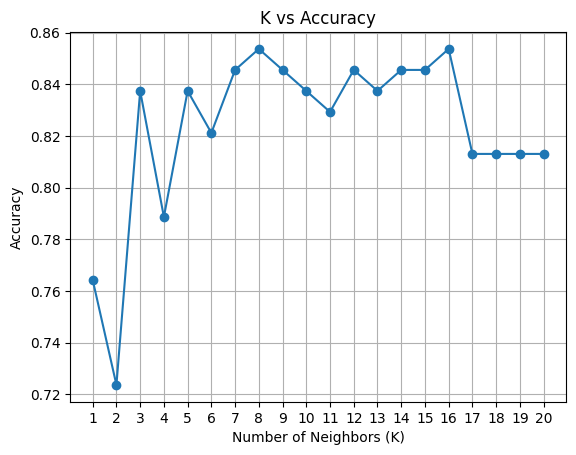

scores = [0.7642276422764228, 0.7235772357723578, 0.8373983739837398, 0.7886178861788617, 0.8373983739837398, 0.8211382113821138, 0.8455284552845529, 0.8536585365853658, 0.8455284552845529, 0.8373983739837398, 0.8292682926829268, 0.8455284552845529, 0.8373983739837398, 0.8455284552845529, 0.8455284552845529, 0.8536585365853658, 0.8130081300813008, 0.8130081300813008, 0.8130081300813008, 0.8130081300813008]


In [ ]:
k_range = range(1,21)
scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_sc, y_train)
    y_pred = model.predict(x_test_sc)
    scores.append(accuracy_score(y_test, y_pred))

# Plotting the accuracy for each K
plt.plot(k_range, scores, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print('scores =', scores)

## 🔹 K-Nearest Neighbors Model
Train a KNN classifier and evaluate it.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train_sc, y_train)
y_predtune = knn.predict(x_test_sc)
y_predtune

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

## 📊 Model Evaluation
Display precision, recall, F1-score, and accuracy.

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predtune))
print("\nClassification Report:\n", classification_report(y_test, y_predtune))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predtune))

Accuracy: 0.8536585365853658

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.61      0.72        38
           1       0.85      0.96      0.90        85

    accuracy                           0.85       123
   macro avg       0.86      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123


Confusion Matrix:
 [[23 15]
 [ 3 82]]


## 🔹 K-Nearest Neighbors Model (Hyperparameter Tuning)
Train a KNN classifier and evaluate it.

In [ ]:
param_grid = {
    'n_neighbors': list(range(1, 31)),# Try k from 1 to 30
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']          # 1 = Manhattan, 2 = Euclidean
}

from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring='f1_macro',
    n_jobs=-1              # Use all CPU cores
)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation accuracy: 0.4988318152794835


In [ ]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(x_test)

## 📊 Model Evaluation
Display precision, recall, F1-score, and accuracy.

In [ ]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.6016260162601627
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.39      0.38        38
           1       0.72      0.69      0.71        85

    accuracy                           0.60       123
   macro avg       0.54      0.54      0.54       123
weighted avg       0.61      0.60      0.61       123

Confusion Matrix:
 [[15 23]
 [26 59]]


## 🔹 Random Forest Model
Train a Random Forest classifier and evaluate it.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators = 200, class_weight = 'balanced', random_state=42)
modelRF.fit(x_train, y_train)
y_predrf = modelRF.predict(x_test)

In [ ]:
y_predrf

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0])

## 📊 Model Evaluation
Display precision, recall, F1-score, and accuracy.

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predrf))
print("\nClassification Report:\n", classification_report(y_test, y_predrf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predrf))

Accuracy: 0.8292682926829268

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.61      0.69        38
           1       0.84      0.93      0.88        85

    accuracy                           0.83       123
   macro avg       0.82      0.77      0.78       123
weighted avg       0.83      0.83      0.82       123


Confusion Matrix:
 [[23 15]
 [ 6 79]]


# 🏢 Feature Importance (RandfomForestClassfier)

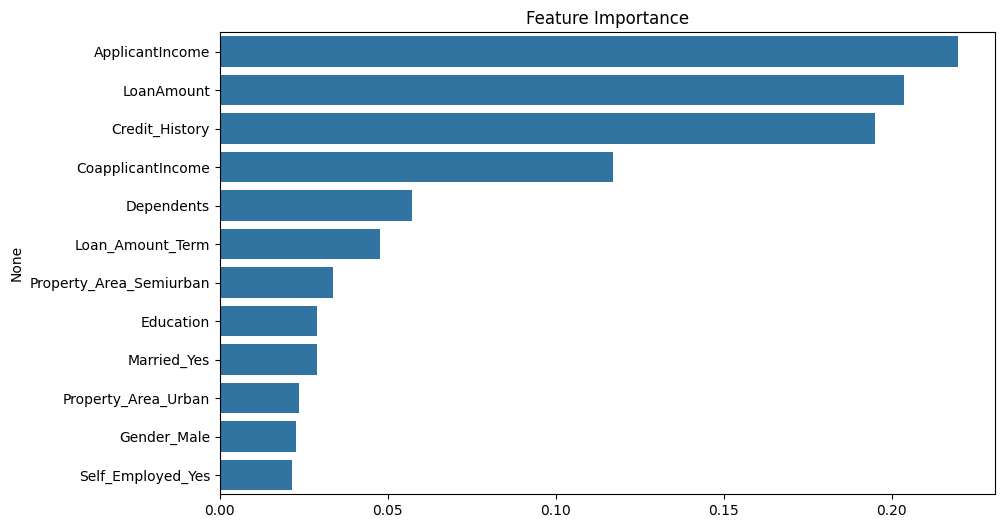

features imp Index(['ApplicantIncome', 'LoanAmount', 'Credit_History', 'CoapplicantIncome',
       'Dependents', 'Loan_Amount_Term', 'Property_Area_Semiurban',
       'Education', 'Married_Yes', 'Property_Area_Urban', 'Gender_Male',
       'Self_Employed_Yes'],
      dtype='object')


In [ ]:
importances = modelRF.feature_importances_
features = x_train.columns
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=features[sorted_indices])
plt.title("Feature Importance")
plt.show()
print('features imp', features[sorted_indices])



# 🔥Applying Boosting Models (AdaBoost)
Using boosting models as random forest was struggling with an  imbalanced dataset


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

adb = AdaBoostClassifier(
    n_estimators=200,       # number of weak learners
    learning_rate=0.05,     # controls contribution of each learner
    random_state=42
)

adb.fit(x_train, y_train)
y_pred_adb = adb.predict(x_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_adb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_adb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_adb))


AdaBoost Accuracy: 0.8536585365853658

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


Confusion Matrix:
 [[21 17]
 [ 1 84]]


# 🔥 XGBoost


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8211382113821138

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.63      0.69        38
           1       0.85      0.91      0.88        85

    accuracy                           0.82       123
   macro avg       0.80      0.77      0.78       123
weighted avg       0.82      0.82      0.82       123


Confusion Matrix:
 [[24 14]
 [ 8 77]]
